In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
# Data Loading
X_model = pd.read_csv('../data/X_model.csv')
Y_model = pd.read_csv('../data/Y_model.csv')

In [40]:
# Combine X_model and Y_model
df_base = pd.concat([X_model, Y_model], axis=1)

In [41]:
df_processed = pd.DataFrame(data=df_base, columns=['business'])
df_processed['cEntire'] = df_base.filter(regex="c" + r"2022[0-9]*", axis=1).fillna(0).sum(axis=1)
df_processed['tEntire'] = df_base.filter(regex="t" + r"2022[0-9]*", axis=1).fillna(0).sum(axis=1)
df_processed['sEntire'] = df_base.filter(regex="s" + r"2022[0-9]*", axis=1).fillna(0).sum(axis=1)

In [42]:
# Filter outliers from df_processed
# Ref: https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/
outliers = []

In [43]:
mean_business = df_processed[df_processed['business'] == 1].mean()
mean_nonbusiness = df_processed[df_processed['business'] == 0].mean()
std_business = df_processed[df_processed['business'] == 1].std()
std_nonbusiness = df_processed[df_processed['business'] == 0].std()

In [44]:
def filter_outliers(key):
    outliers.extend(df_processed.loc[(df_processed[key] > mean_business[key] + 3 * std_business[key]) & (df_processed['business'] == 1)].index)
    outliers.extend(df_processed.loc[(df_processed[key] < mean_business[key] - 3 * std_business[key]) & (df_processed['business'] == 1)].index)
    outliers.extend(df_processed.loc[(df_processed[key] > mean_nonbusiness[key] + 3 * std_nonbusiness[key]) & (df_processed['business'] == 0)].index)
    outliers.extend(df_processed.loc[(df_processed[key] < mean_nonbusiness[key] - 3 * std_nonbusiness[key]) & (df_processed['business'] == 0)].index)

In [45]:
filter_outliers('cEntire')
filter_outliers('tEntire')
filter_outliers('sEntire')

In [46]:
outliers = list(set(outliers))
len(outliers)

22515

In [47]:
# Filter outliers from df
def filter_outliers_from_df(df: pd.DataFrame, outliers):
    return df.drop(outliers)

In [49]:
df = filter_outliers_from_df(df_base, outliers)

In [50]:
X_c = df.filter(regex="c" + r"2022[0-9]*", axis=1).fillna(0)
X_t = df.filter(regex="t" + r"2022[0-9]*", axis=1).fillna(0)
X_s = df.filter(regex="s" + r"2022[0-9]*", axis=1).fillna(0)

In [51]:
# Create a filtered new dataframe of which business column of df has a value of 1
df_filtered = df[df['business'] == 1]
X_c_filtered = df_filtered.filter(regex="c" + r"2022[0-9]*", axis=1).fillna(0)
X_t_filtered = df_filtered.filter(regex="t" + r"2022[0-9]*", axis=1).fillna(0)
X_s_filtered = df_filtered.filter(regex="s" + r"2022[0-9]*", axis=1).fillna(0)

In [52]:
df_rest = df[df['business'] == 0]
X_c_rest = df_rest.filter(regex="c" + r"2022[0-9]*", axis=1).fillna(0)
X_t_rest = df_rest.filter(regex="t" + r"2022[0-9]*", axis=1).fillna(0)
X_s_rest = df_rest.filter(regex="s" + r"2022[0-9]*", axis=1).fillna(0)

In [53]:
X_c_relative = X_c_filtered / X_c_filtered.sum(axis=1).values.reshape(-1, 1)
X_t_relative = X_t_filtered / X_t_filtered.sum(axis=1).values.reshape(-1, 1)
X_s_relative = X_s_filtered / X_s_filtered.sum(axis=1).values.reshape(-1, 1)

In [54]:
X_c_rest_relative = X_c_rest / X_c_rest.sum(axis=1).values.reshape(-1, 1)
X_t_rest_relative = X_t_rest / X_t_rest.sum(axis=1).values.reshape(-1, 1)
X_s_rest_relative = X_s_rest / X_s_rest.sum(axis=1).values.reshape(-1, 1)

In [55]:
# Make a label from 2022.01.01 to 2022.08.26. 15 days interval
date = pd.date_range("2022-01-01", "2022-08-26", freq="15D")
# Convert date to a list of string
date = date.strftime("%Y-%m-%d").tolist()
# Insert empty strings between each date
daterange = []
for d in date:
    daterange.append(d)
    [daterange.append("") for _ in range(14)]
daterange = daterange[0: 238]
daterange[-1] = "2022-08-26"

In [56]:
X_c_relative_mean = X_c_relative.mean(axis=0)
X_t_relative_mean = X_t_relative.mean(axis=0)
X_s_relative_mean = X_s_relative.mean(axis=0)

X_c_rest_relative_mean = X_c_rest_relative.mean(axis=0)
X_t_rest_relative_mean = X_t_rest_relative.mean(axis=0)
X_s_rest_relative_mean = X_s_rest_relative.mean(axis=0)

In [57]:
X_c_relative_diff = 100 * (X_c_relative_mean - X_c_rest_relative_mean)
X_t_relative_diff = 100 * (X_t_relative_mean - X_t_rest_relative_mean)
X_s_relative_diff = 100 * (X_s_relative_mean - X_s_rest_relative_mean)

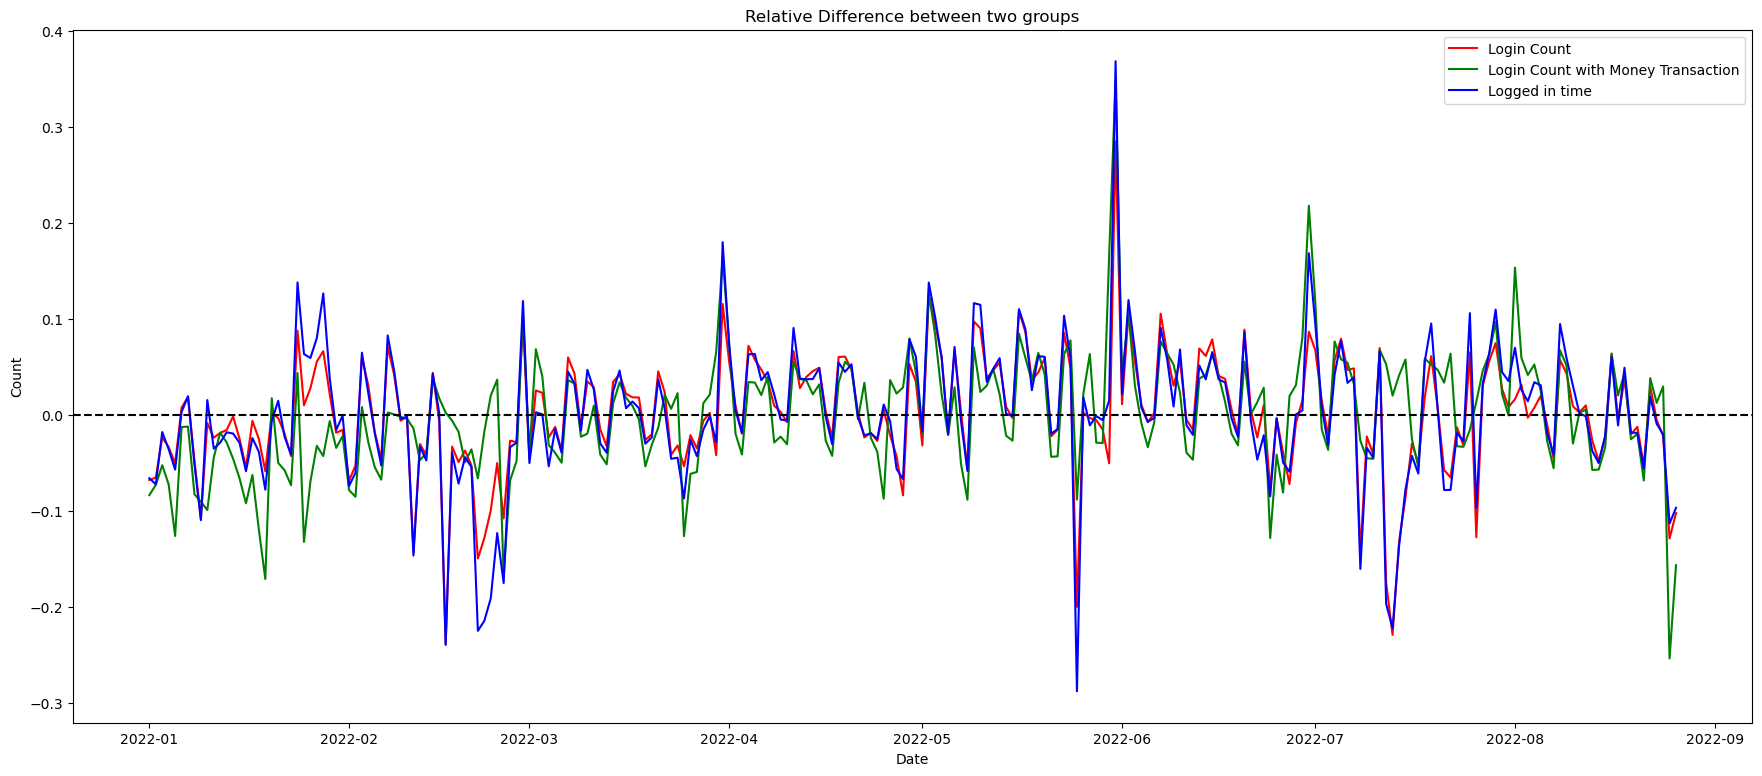

In [58]:
date = pd.date_range("2022-01-01", "2022-08-26", freq="1D")
# Plot X_c_relative_diff, X_t_relative_diff, X_s_relative_diff in one figure. Show legend in the figure.
fig, ax = plt.subplots(figsize=(20, 10))
fig.tight_layout(pad=10.0)
ax.set_title("Relative Difference between two groups")
ax.set_xlabel("Date")
ax.set_ylabel("Count")
ax.plot(date, X_c_relative_diff.values.T, color="red", label="Login Count")
ax.plot(date, X_t_relative_diff.values.T, color="green", label="Login Count with Money Transaction")
ax.plot(date, X_s_relative_diff.values.T, color="blue", label="Logged in time")
ax.legend()

# Draw horizontal line art y=0

ax.axhline(y=0, color="black", linestyle="--")

# Draw vertical line at each of end of month

# line_points = [
#     -1 + (31 + 32) / 2, # Time between Jan.31 and Feb.1
#     -1 + 31 + (28 + 29) / 2, # Time between Feb.28 and Mar.1
#     -1 + 31 + 28 + (31 + 32) / 2, # Time between Mar.31 and Apr.1
#     -1 + 31 + 28 + 31 + (30 + 31) / 2, # Time between Apr.30 and May.1
#     -1 + 31 + 28 + 31 + 30 + (31 + 32) / 2, # Time between May.31 and Jun.1
#     -1 + 31 + 28 + 31 + 30 + 31 + (30 + 31) / 2, # Time between Jun.30 and Jul.1
#     -1 + 31 + 28 + 31 + 30 + 31 + 30 + (31 + 32) / 2, # Time between Jul.31 and Aug.1
# ]
# line_points = list(map(lambda x: 1643673600 + x * 86400, line_points))

# for point in line_points:
#     ax.axvline(x=point, color="yellow", linestyle="--")

plt.show()

/var/folders/xf/sy2fwpl54bzcxvmkf38nzntw0000gn/T/ipykernel_12984/3756444639.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(daterange, rotation=90)
/var/folders/xf/sy2fwpl54bzcxvmkf38nzntw0000gn/T/ipykernel_12984/3756444639.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(daterange, rotation=90)
/var/folders/xf/sy2fwpl54bzcxvmkf38nzntw0000gn/T/ipykernel_12984/3756444639.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2].set_xticklabels(daterange, rotation=90)


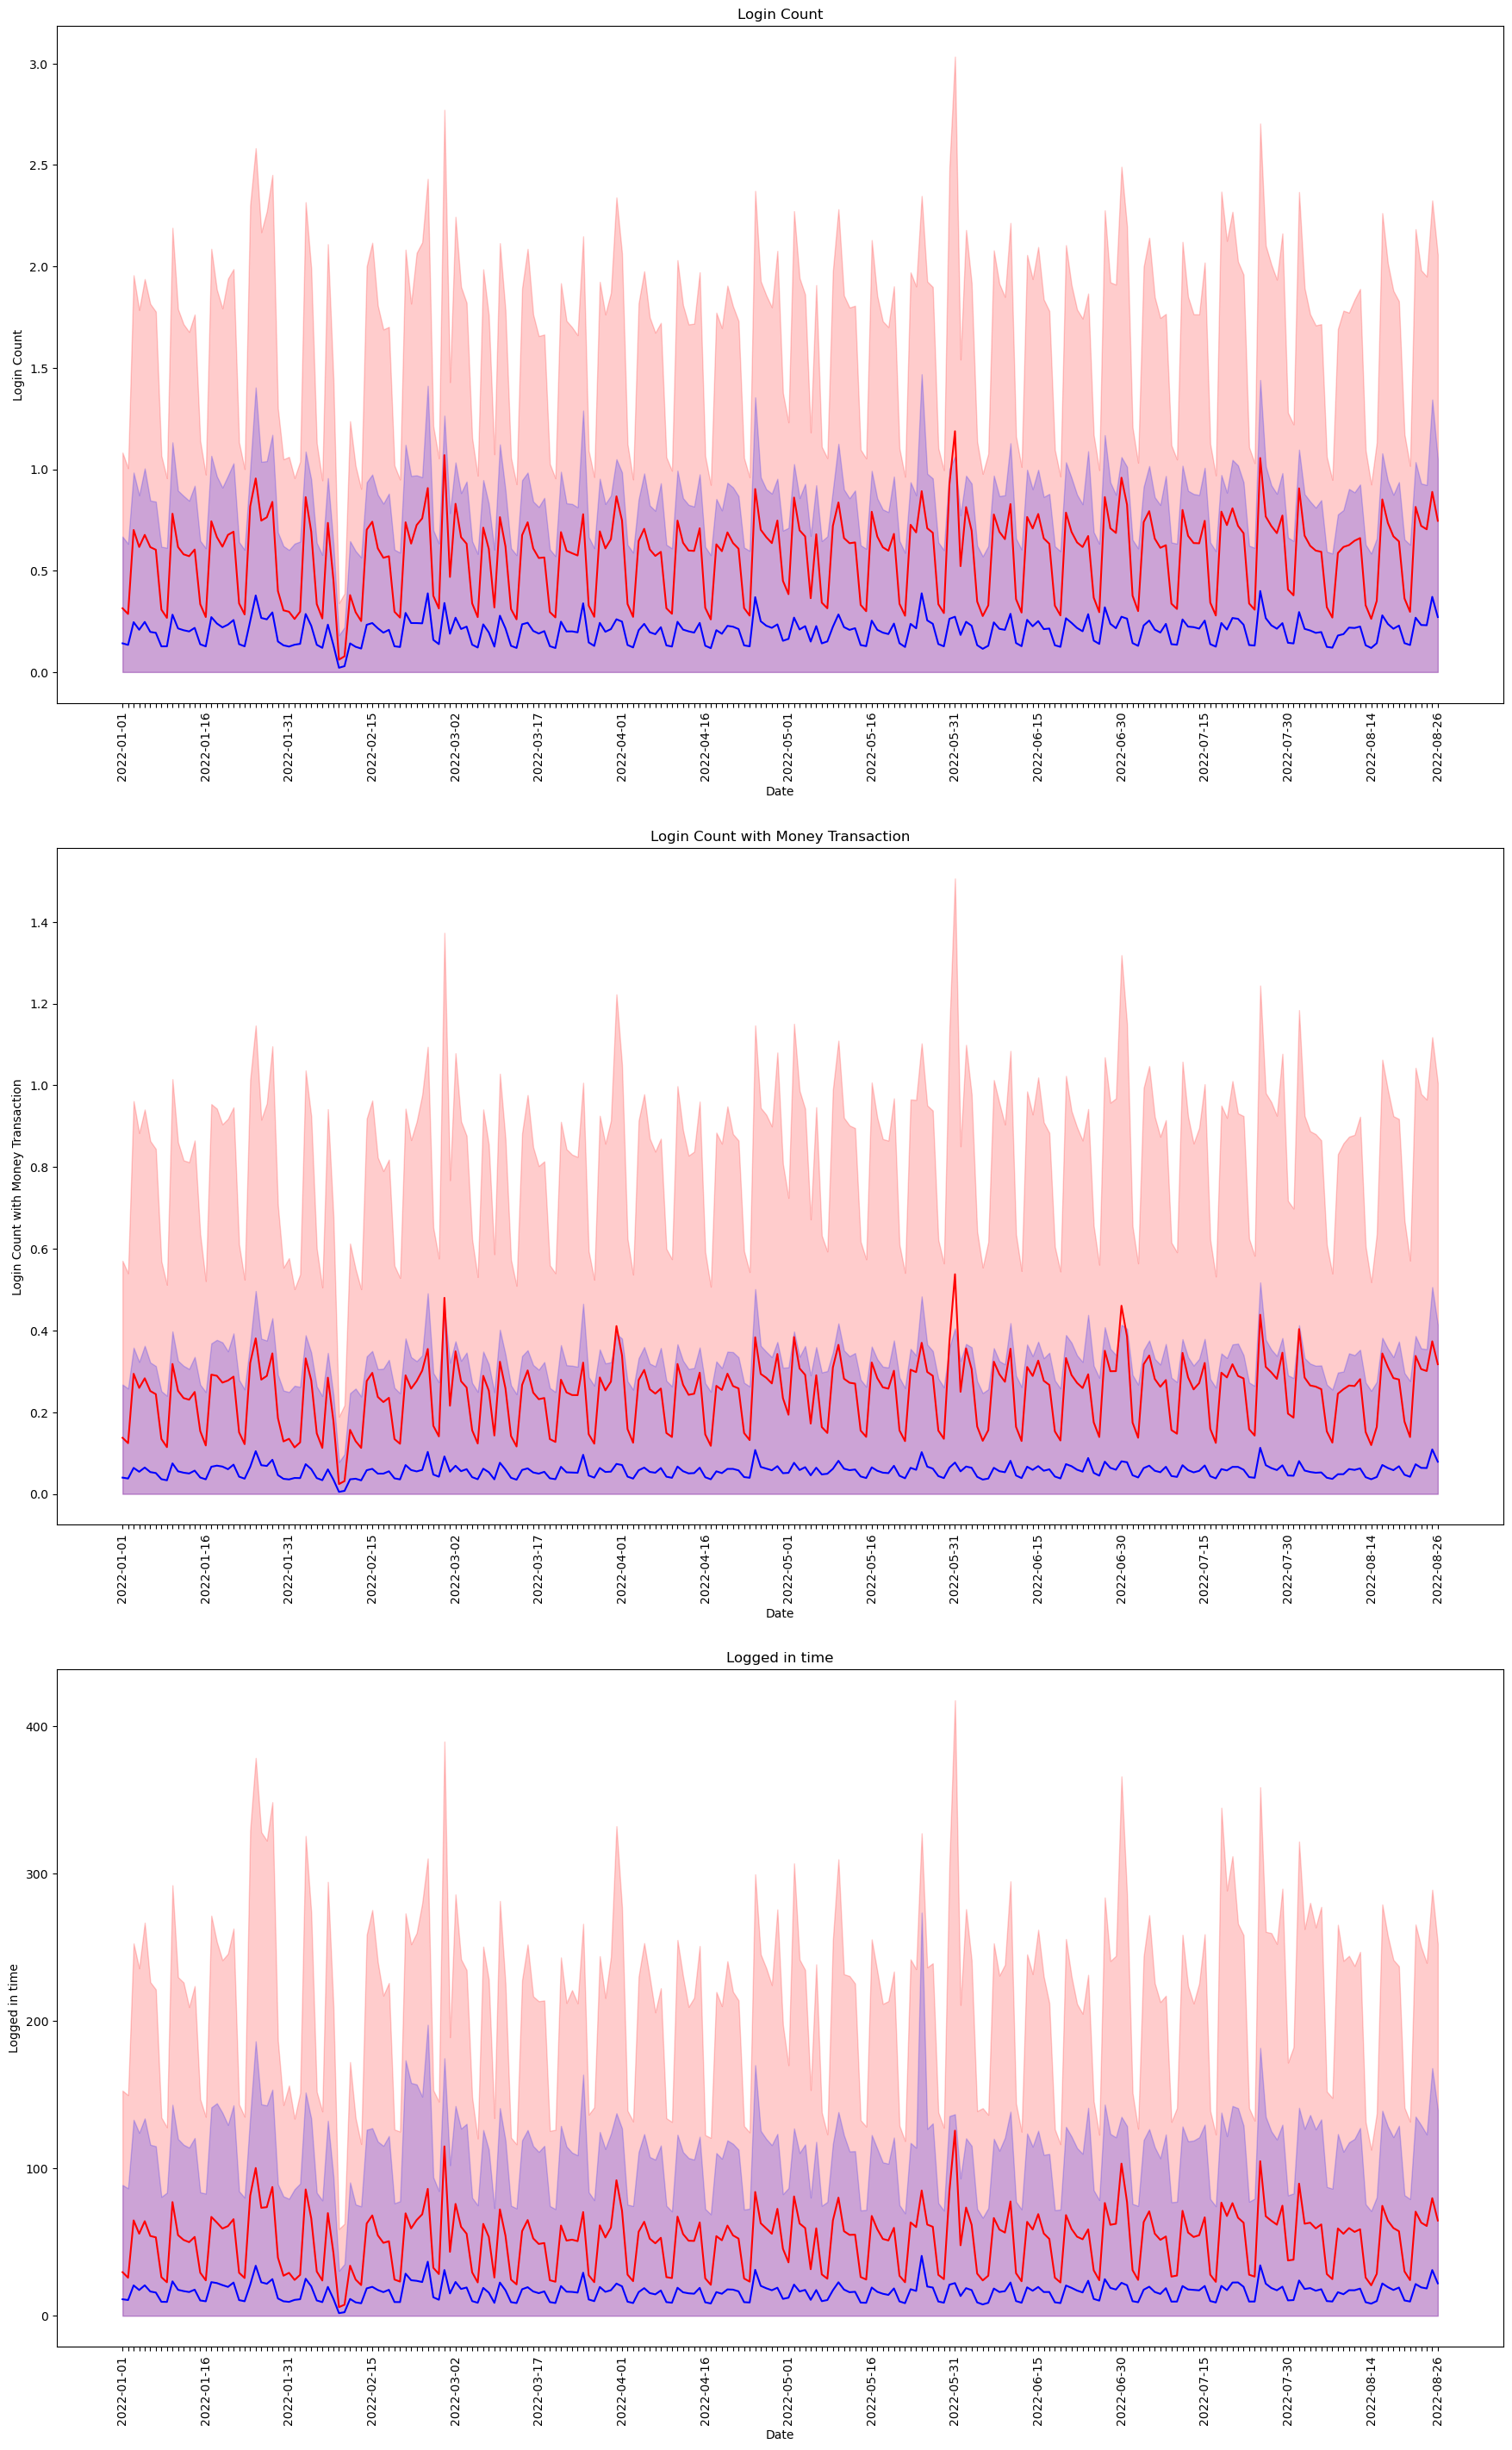

In [59]:
# Plot average of each columns of X_c_filtered, X_t_filtered, X_s_filtered. Big fig size
fig, axes = plt.subplots(3, 1, figsize=(20, 30))
fig.tight_layout(pad=10.0)
axes[0].set_title("Login Count")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Login Count")
axes[0].plot(X_c_filtered.mean(axis=0), color="red")
axes[0].plot(X_c_rest.mean(axis=0), color="blue")
axes[0].set_xticklabels(daterange, rotation=90)
axes[1].set_title("Login Count with Money Transaction")
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Login Count with Money Transaction")
axes[1].plot(X_t_filtered.mean(axis=0), color="red")
axes[1].plot(X_t_rest.mean(axis=0), color="blue")
axes[1].set_xticklabels(daterange, rotation=90)
axes[2].set_title("Logged in time")
axes[2].set_xlabel("Date")
axes[2].set_ylabel("Logged in time")
axes[2].plot(X_s_filtered.mean(axis=0), color="red")
axes[2].plot(X_s_rest.mean(axis=0), color="blue")
axes[2].set_xticklabels(daterange, rotation=90)

# Overlay standard deviation of each columns of X_c_filtered, X_t_filtered, X_s_filtered. Overlaying graph is bigger than 0
axes[0].fill_between(range(238), 0, X_c_filtered.mean(axis=0) + X_c_filtered.std(axis=0), color="red", alpha=0.2)
axes[0].fill_between(range(238), 0, X_c_rest.mean(axis=0) + X_c_rest.std(axis=0), color="blue", alpha=0.2)
axes[1].fill_between(range(238), 0, X_t_filtered.mean(axis=0) + X_t_filtered.std(axis=0), color="red", alpha=0.2)
axes[1].fill_between(range(238), 0, X_t_rest.mean(axis=0) + X_t_rest.std(axis=0), color="blue", alpha=0.2)
axes[2].fill_between(range(238), 0, X_s_filtered.mean(axis=0) + X_s_filtered.std(axis=0), color="red", alpha=0.2)
axes[2].fill_between(range(238), 0, X_s_rest.mean(axis=0) + X_s_rest.std(axis=0), color="blue", alpha=0.2)

plt.show()